# import libraries and data 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv')


In [3]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
# we dont need id

data.drop(columns=['Id'],inplace=True)

# general info 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
data.shape

(1460, 80)

In [7]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# null values 

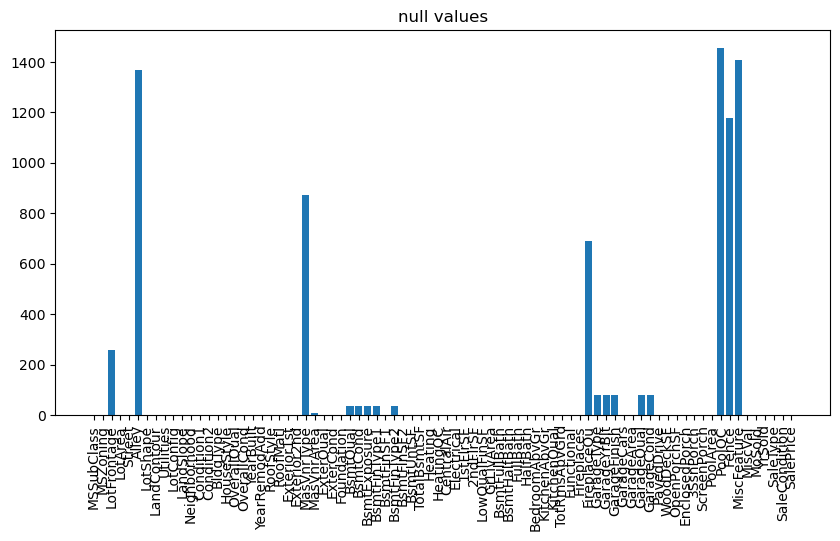

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.bar(data.columns,data.isnull().sum().values)
plt.title('null values')
plt.xticks(rotation=90)
plt.show()

# deal with null values 

## if the total nulls for a column is greater than 30% of the total rows we will drop those columns 
## otherwise we will draw a distribution  based on the column and take random samples from there 

In [9]:
threshold  = int(data.shape[0]*30/100)
nal_val = data.isnull().sum().values
columns = data.columns
to_drop = []

for i in range(len(nal_val)):
    if nal_val[i] > threshold:
        to_drop.append(columns[i])
    else:
        pass
        

In [10]:
print(f'columns with total null values more than {threshold} are :{to_drop}')

columns with total null values more than 438 are :['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [11]:
data.drop(columns=to_drop,inplace=True)


## columns with nulls > 30% are droped now , time to fill the missing values from the others by their distribution

In [12]:
cols_w_nuls = [col for col in data.columns if data[col].isnull().sum()>0]


### lets see the distributions of those columns

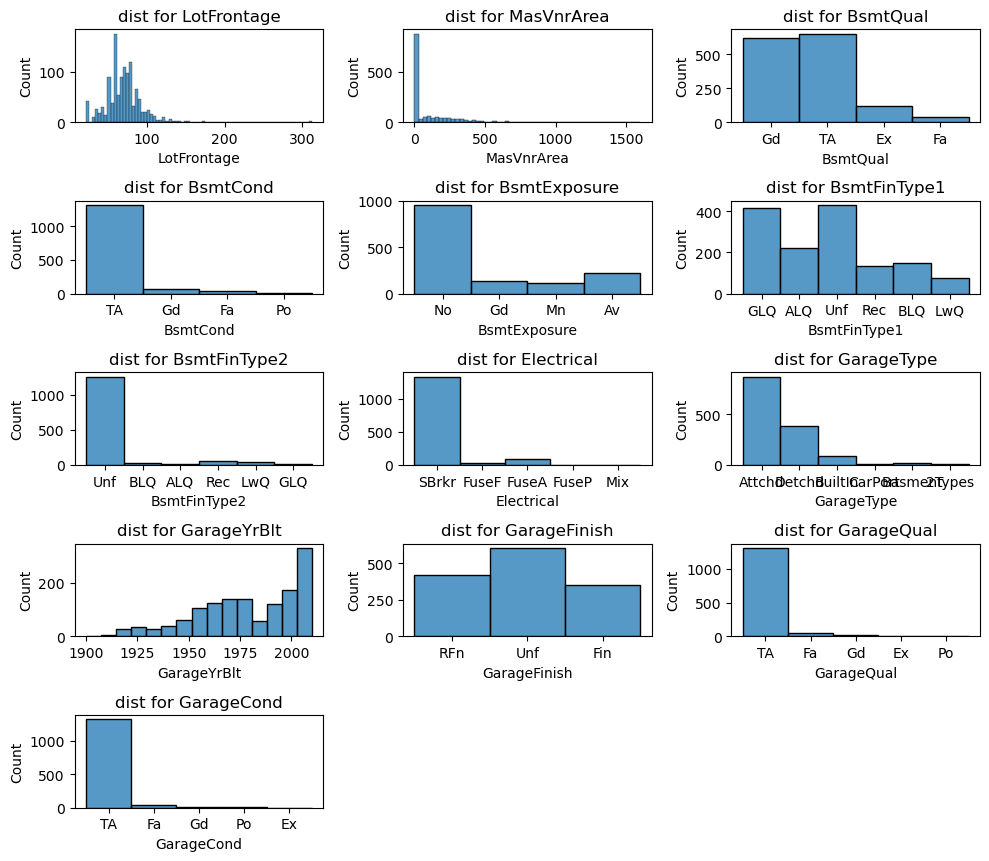

In [13]:
plt.figure(figsize=(10,10))
for i in range(len(cols_w_nuls)):
    plt.subplot(6,3,i+1)
    sns.histplot(data[cols_w_nuls[i]])
    plt.title(f'dist for {cols_w_nuls[i]}')
plt.tight_layout()
plt.show()

### now fill the nulls

In [14]:
import random 

#train 
for i in cols_w_nuls:
    dist = data[i].values
    data[i].fillna(random.choice(dist),inplace=True)



In [15]:
data.isnull().sum().sum()


0

## check for duplicated

In [16]:
data.duplicated().sum()

0

## check for outliers 

In [17]:
cols_outliers = data.select_dtypes(include=np.number) # get only the numeric columns 
treshold = 8
cnt = 0
columns_of_outliers = [] # save the columns with outliers 
indexes = []
for column in cols_outliers:
    
    vals = data[column].values
    
    mean = np.mean(data[column])
    std = np.std(data[column])
    
    for index,val in enumerate(vals):

        z = (val-mean)/std
        if z> treshold:
            print(f'outlier {z},{column}')
            columns_of_outliers.append(column)
            indexes.append(index)
            
            cnt+=1
print(cnt)
        

outlier 10.795053028542876,LotFrontage
outlier 10.795053028542876,LotFrontage
outlier 14.88128503372421,LotArea
outlier 20.518273157773258,LotArea
outlier 15.448541728223589,LotArea
outlier 10.48644875978564,LotArea
outlier 8.27251631905014,MasVnrArea
outlier 11.405752927121862,BsmtFinSF1
outlier 8.851637899984556,BsmtFinSF2
outlier 11.520949229255594,TotalBsmtSF
outlier 9.132681280322807,1stFlrSF
outlier 10.433918154713346,LowQualFinSF
outlier 10.742519320749839,LowQualFinSF
outlier 11.647749407790213,LowQualFinSF
outlier 8.520590925287097,LowQualFinSF
outlier 9.610981711949368,LowQualFinSF
outlier 10.475064976851545,LowQualFinSF
outlier 9.775569000502163,LowQualFinSF
outlier 10.454491565782446,LowQualFinSF
outlier 8.04740247069781,LowQualFinSF
outlier 9.734422178363964,LowQualFinSF
outlier 8.138679732462114,BsmtHalfBath
outlier 8.138679732462114,BsmtHalfBath
outlier 8.868611964533047,KitchenAbvGr
outlier 8.868611964533047,KitchenAbvGr
outlier 8.675309103738382,EnclosedPorch
outlier 1

In [18]:
columns_of_outliers = list(set(columns_of_outliers))
len(columns_of_outliers)

15

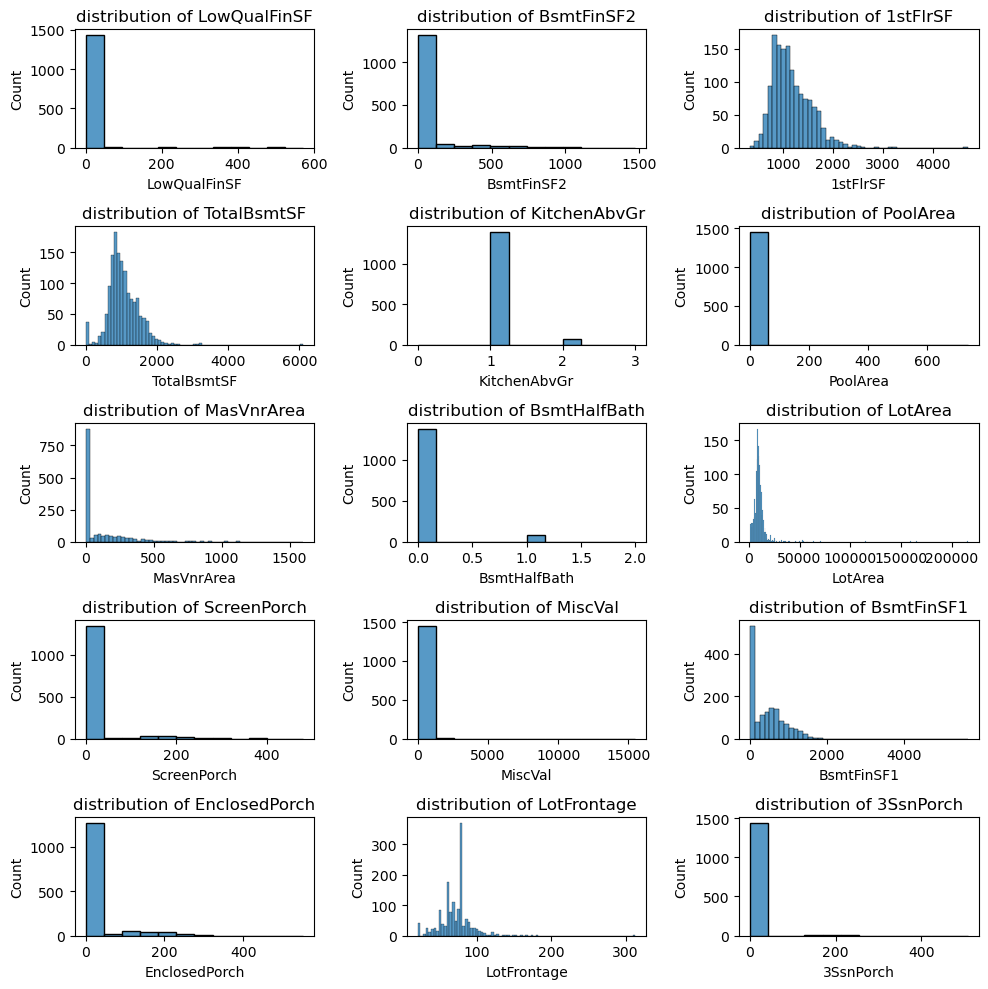

In [19]:
## check the distributions


plt.figure(figsize=(10,10))
for i in range(len(columns_of_outliers)):
    plt.subplot(5,3,i+1)
    sns.histplot(data[columns_of_outliers[i]])
    plt.title(f'distribution of {columns_of_outliers[i]}')
plt.tight_layout()
plt.show()
    

### we took the columns form the outliers and picture their distribution to confirm visualy that they are indeed outliers, so we will drop them 

In [20]:
data.drop(index=indexes,inplace=True)

In [21]:
data.shape

(1422, 74)

# we are done with null values , duplicates and outliers 
# now we will remove the unnesesery collumns 

## first we will take the numeric columns and the categoricals ceperate 

In [22]:
nums = data.select_dtypes(include=np.number)
cats = data.select_dtypes(exclude=np.number)

In [23]:
nums.shape,cats.shape

((1422, 37), (1422, 37))


# start with numeric 

## first correlation

<Axes: >

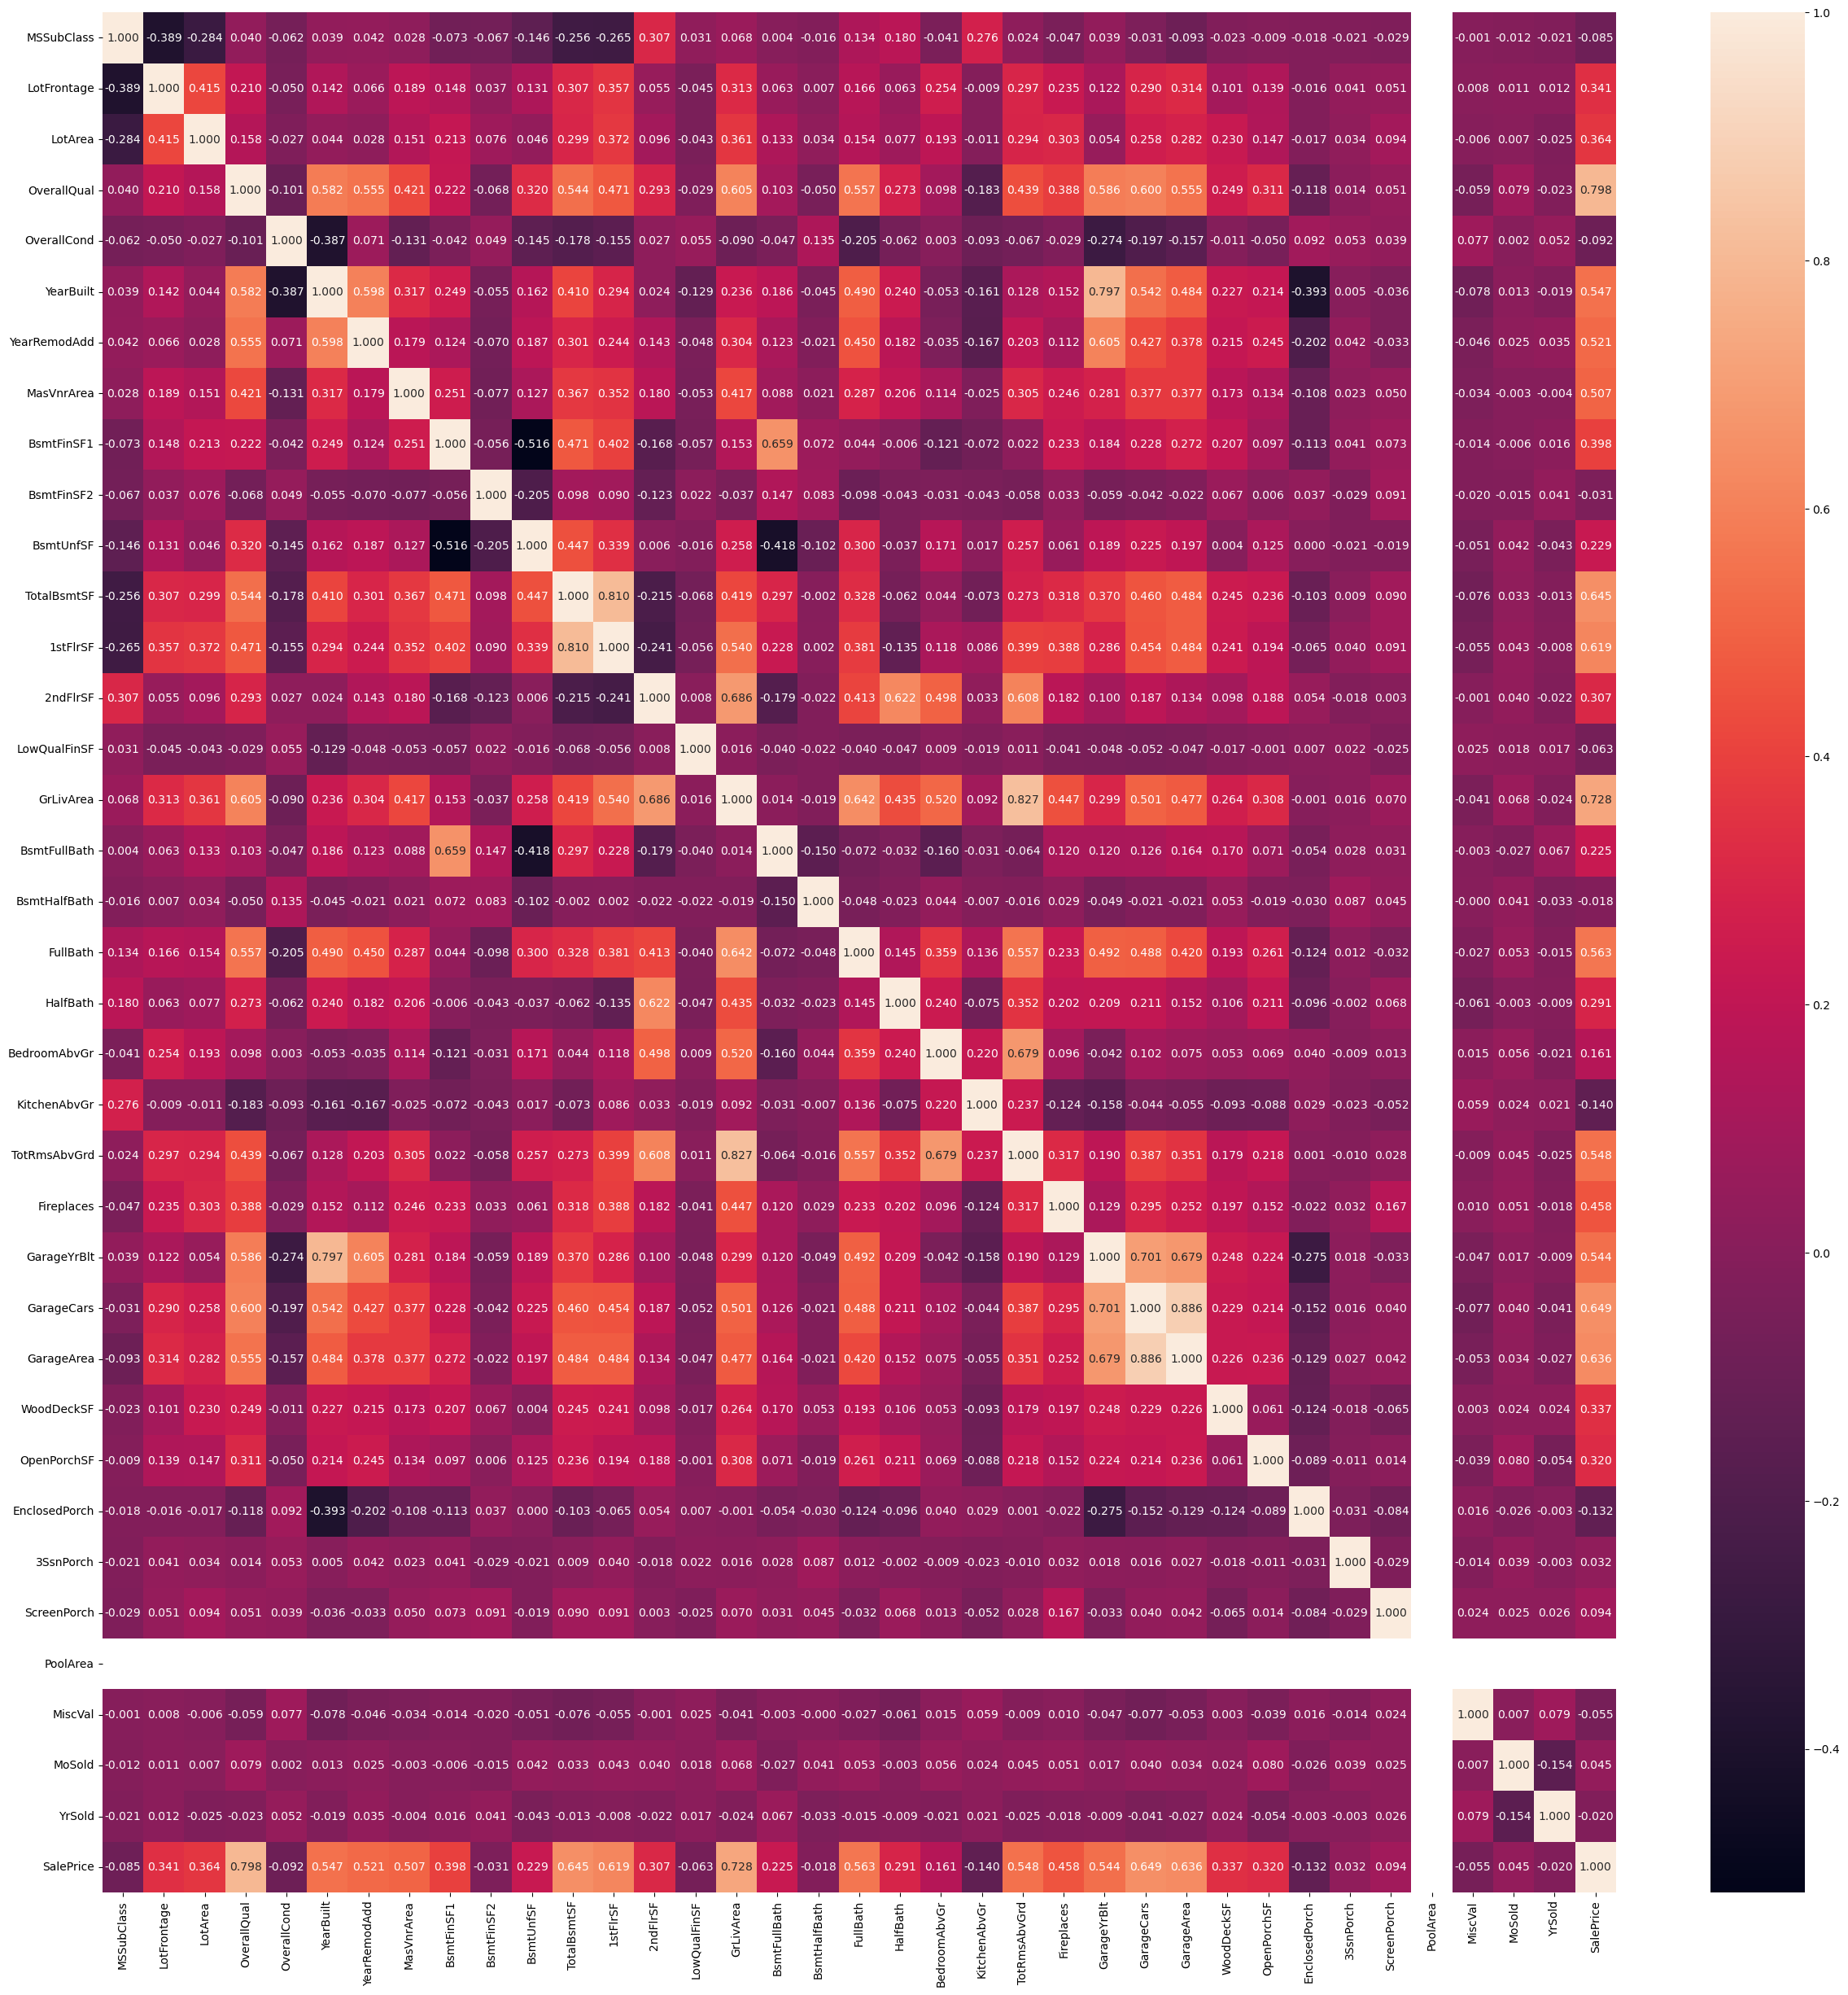

In [24]:
plt.figure(figsize=(30,30))
sns.heatmap(nums.corr(),annot=True,fmt='.3f')

### we want the correlations with salesprice ,so:

In [25]:
nums.corr()['SalePrice']

MSSubClass      -0.085437
LotFrontage      0.340971
LotArea          0.364005
OverallQual      0.797900
OverallCond     -0.092209
YearBuilt        0.546558
YearRemodAdd     0.521186
MasVnrArea       0.506616
BsmtFinSF1       0.398456
BsmtFinSF2      -0.031351
BsmtUnfSF        0.229107
TotalBsmtSF      0.644994
1stFlrSF         0.619171
2ndFlrSF         0.307214
LowQualFinSF    -0.062667
GrLivArea        0.727942
BsmtFullBath     0.224797
BsmtHalfBath    -0.017734
FullBath         0.563101
HalfBath         0.290657
BedroomAbvGr     0.160871
KitchenAbvGr    -0.140422
TotRmsAbvGrd     0.548498
Fireplaces       0.457880
GarageYrBlt      0.543755
GarageCars       0.648874
GarageArea       0.635998
WoodDeckSF       0.337232
OpenPorchSF      0.319717
EnclosedPorch   -0.131957
3SsnPorch        0.032068
ScreenPorch      0.093678
PoolArea              NaN
MiscVal         -0.054589
MoSold           0.045109
YrSold          -0.020130
SalePrice        1.000000
Name: SalePrice, dtype: float64

### before continuing we noticed that poolArea is always 0  with null correlation so we drop it


In [26]:

print(data['PoolArea'].value_counts())

PoolArea
0    1422
Name: count, dtype: int64


In [27]:



data.drop(columns=['PoolArea'],inplace=True)
nums.drop(columns=['PoolArea'],inplace=True)

## continuing with correlations :

###  we will consider a correlation insignificant if its smaller than |0.05|




In [28]:
cors = nums.corr()['SalePrice']

In [29]:
cols_drop_corr = []
for i in range(len(nums.columns)):
    if abs(cors[i]) <0.05:
        cols_drop_corr.append(nums.columns[i])
        

C:\Users\mplan\AppData\Local\Temp\ipykernel_18420\3611542564.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(cors[i]) <0.05:


In [30]:
cols_drop_corr

['BsmtFinSF2', 'BsmtHalfBath', '3SsnPorch', 'MoSold', 'YrSold']

## those columns will be droped 

In [31]:
data.drop(columns=cols_drop_corr,inplace=True)


In [32]:
nums.drop(columns=cols_drop_corr,inplace=True)

In [33]:
data.shape

(1422, 68)

# now mutual information 

In [34]:
from  sklearn.feature_selection import mutual_info_regression as mi

import warnings

warnings.filterwarnings("ignore")

In [35]:
x = np.asarray(nums['SalePrice']).reshape(-1,1)
scores = []
cols_mi = []
for i in nums.drop('SalePrice',axis=1):
    y = np.asarray(nums[i]).reshape(-1,1)
    score = mi(x,y)
    scores.append(score)
    cols_mi.append(i)


In [36]:
to_drop_mi = []
for i in range(len(cols_mi)):
    if scores[i] < 0.05:
        print(f'score {scores[i]}, column : {cols_mi[i]}')
        to_drop_mi.append(cols_mi[i])

score [0], column : LowQualFinSF
score [0], column : BsmtFullBath
score [0.04399482], column : BedroomAbvGr
score [0.04465811], column : KitchenAbvGr
score [0.02585113], column : EnclosedPorch
score [0.00422725], column : ScreenPorch
score [0.00382248], column : MiscVal


## those collumns will be droped  too 

In [37]:
data.drop(columns=to_drop_mi,inplace=True)


In [38]:
data.shape

(1422, 61)

# Categirical features

### we have to convert them to numeric ones so:


In [39]:
def numeric(x):
    uniques = cats[x].unique()
    lens =  [i for i in range(len(uniques))]
    cats[x].replace(uniques,lens,inplace=True)
    
for i in cats.columns:
    numeric(i)

In [40]:
cats['SalePrice'] = data['SalePrice']

In [41]:
cors_cat = cats.corr()['SalePrice'] 

In [42]:
cors_cat

MSZoning        -0.118361
Street          -0.052975
LotShape         0.256973
LandContour      0.086334
Utilities       -0.014424
LotConfig        0.103220
LandSlope        0.026423
Neighborhood    -0.147870
Condition1      -0.059029
Condition2       0.001703
BldgType        -0.110626
HouseStyle      -0.207745
RoofStyle        0.162184
RoofMatl         0.032698
Exterior1st     -0.132486
Exterior2nd     -0.194008
ExterQual       -0.266841
ExterCond       -0.126451
Foundation      -0.463549
BsmtQual         0.023687
BsmtCond        -0.075669
BsmtExposure     0.219796
BsmtFinType1    -0.358254
BsmtFinType2    -0.059484
Heating         -0.117236
HeatingQC       -0.440144
CentralAir      -0.251825
Electrical      -0.234307
KitchenQual     -0.129140
Functional      -0.112047
GarageType      -0.101331
GarageFinish     0.205914
GarageQual      -0.090044
GarageCond      -0.115150
PavedDrive      -0.207544
SaleType         0.062021
SaleCondition    0.145097
SalePrice        1.000000
Name: SalePr

In [43]:
to_drop_cats = []
cols = [col for col in cats.columns]
vals = [i for i in cors_cat]

for i in range(len(vals)):
    if abs(vals[i]) <0.05:
        to_drop_cats.append(cols[i])
        

In [44]:
to_drop_cats

['Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtQual']

## those columns will be droped 

In [45]:
data.drop(columns=to_drop_cats,inplace=True)


In [46]:
data.shape

(1422, 56)

###  convert categorical to numeric

In [47]:
def numeric(x,frame):
    uniques = frame[x].unique()
    lens =  [i for i in range(len(uniques))]
    frame[x].replace(uniques,lens,inplace=True)
    
    
cat = []
for i in data.select_dtypes(exclude=np.number).columns:
    cat.append(i)
    
for i in cat:
    numeric(i,data)


# check for multicolinearity 

## we will consider a multicolinear pair if its bigget than 0.7

In [48]:
cors = data.drop(columns=['SalePrice']).corr()
cols = cors.columns
cc = []
for i in cols:
    x = cors.loc[abs(cors[i]) > 0.7,i]
    cc.append((i , x.values[0] ,x.index[0]))

for i in cc : 
    if i[1] != 1:
        print(f'{i[0]}  has  {i[1]}   correlation with   {i[2]}')

BldgType  has  0.7776458249603818   correlation with   MSSubClass
Exterior2nd  has  0.7525211028420019   correlation with   Exterior1st
1stFlrSF  has  0.8095890694382406   correlation with   TotalBsmtSF
TotRmsAbvGrd  has  0.8265300450276246   correlation with   GrLivArea
GarageYrBlt  has  0.7972392238895522   correlation with   YearBuilt
GarageCars  has  0.701283080337515   correlation with   GarageYrBlt
GarageArea  has  0.8859985045257214   correlation with   GarageCars


## so MSSubClass,Exterior1st,TotalBsmtSF,GrLivArea,GarageYrBlt  ,GarageCars will be droped 

In [49]:
data.drop(columns=['MSSubClass','Exterior1st','TotalBsmtSF','GrLivArea','YearBuilt','GarageCars'],inplace=True)


In [50]:
data.shape

(1422, 50)

# Now we are ready to prepare the data for training 

In [51]:
x = data.drop(columns=['SalePrice']).values
y = data['SalePrice'].values


from sklearn.model_selection import train_test_split as tt

x_train,x_test,y_train,y_test = tt(x,y,test_size=0.2)



## scale the data 

In [52]:
from sklearn.preprocessing import StandardScaler as ss

In [53]:
scaler = ss()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## we will create a metric function to measure our models performanse

In [54]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from math import sqrt
history = []
hist_df = []

def metrics(estimator,pred,actual=y_test,hist = history,features = x_train.shape[1],hist_df = hist_df):
    new = []
    n_df = []
    
    r2 = r2_score(pred,actual)
    mae = mean_absolute_error(pred,actual)
    rmse = sqrt(mean_squared_error(pred,actual))
    adjusted_r2  = 1 - (1-r2) * (len(pred)-1)/(len(pred)-features-1)
    new.append(f'{estimator} have {mae} mean absolute error , {rmse} root  mean squared error , {r2} R squared and {adjusted_r2} adjusted R squared')
    print(new)
    n_df.append((estimator,mae,rmse,r2,adjusted_r2))
    history.append(new)
    hist_df.append(n_df)

    
    
    

## a function for griv search cv to find the best parameters 

In [55]:
from sklearn.model_selection import GridSearchCV

def grid(parameters , estimator, x = x_train,y = y_train):
    grid_s = GridSearchCV(estimator=estimator,param_grid=parameters,scoring=['r2'],cv=8,n_jobs=-1,refit='r2')
    grid_s.fit(x,y)
    best_r2 = grid_s.best_score_
    best_params = grid_s.best_params_
    print(f'best r2 = {best_r2}')
    print(f'best params = {best_params}')

## linear regression 

In [56]:
from sklearn.linear_model import LinearRegression as lr

linear = lr()
linear.fit(x_train,y_train)

LinearRegression()

In [57]:
linear_preds = linear.predict(x_test)

In [58]:
metrics(linear,linear_preds)

['LinearRegression() have 20569.013712324595 mean absolute error , 29481.20236323873 root  mean squared error , 0.8203148516911766 R squared and 0.782848586724656 adjusted R squared']


## decesion tree

In [59]:
params = {'criterion':['squared_error','squared_error','absolute_error'],'max_features':['auto','sqrt','log2'],'min_samples_leaf':[1,2,3,4],'min_samples_split':[1,2,3,4]}


from sklearn.tree import DecisionTreeRegressor 
tree = DecisionTreeRegressor()

grid(params,tree,x_train,y_train)

best r2 = 0.7023047668853275
best params = {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4}


In [60]:
tree = DecisionTreeRegressor(criterion='absolute_error',max_features='sqrt',min_samples_leaf=4,min_samples_split=4)
tree.fit(x_train,y_train)
tree_preds = tree.predict(x_test)
metrics(tree,tree_preds)

["DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt',\n                      min_samples_leaf=4, min_samples_split=4) have 29308.15263157895 mean absolute error , 43092.72396888797 root  mean squared error , 0.6779943718892159 R squared and 0.6108527728363289 adjusted R squared"]


## random forest 

In [61]:
from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor(criterion='poisson',min_samples_split=2,min_samples_leaf=4,n_estimators=50)
forest.fit(x_train,y_train)
forest_preds = forest.predict(x_test)
metrics(forest,forest_preds)

["RandomForestRegressor(criterion='poisson', min_samples_leaf=4, n_estimators=50) have 18099.585412564677 mean absolute error , 27989.681660986334 root  mean squared error , 0.8254470972216237 R squared and 0.7890509600465581 adjusted R squared"]


## Ridge 

In [62]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
ridge_preds = ridge.predict(x_test)
metrics(ridge,ridge_preds)

['Ridge() have 20569.052109730022 mean absolute error , 29476.599150244343 root  mean squared error , 0.8202692086281805 R squared and 0.7827934265974608 adjusted R squared']


## Lasso 

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
lasso_preds = lasso.predict(x_test)
metrics(lasso,lasso_preds)

['Lasso() have 20567.16676788768 mean absolute error , 29479.4857254522 root  mean squared error , 0.8203184899041428 R squared and 0.78285298354373 adjusted R squared']


## ElasticNet

In [64]:
 from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train,y_train)
elasticnet_preds = elasticnet.predict(x_test)
metrics(elasticnet,elasticnet_preds) 

['ElasticNet() have 20901.37138919716 mean absolute error , 30223.032426516835 root  mean squared error , 0.7645349687033574 R squared and 0.7154380047308659 adjusted R squared']


## BayesianRidge 

In [65]:
from  sklearn.linear_model import BayesianRidge
bayes = BayesianRidge()
bayes.fit(x_train,y_train)
bayes_pred = bayes.predict(x_test)
metrics(bayes,bayes_pred)

['BayesianRidge() have 20563.84499014373 mean absolute error , 29399.011909788263 root  mean squared error , 0.8188195899032196 R squared and 0.7810415469468697 adjusted R squared']


##  SGDRegressor

In [66]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
sgd_pred = sgd.predict(x_test)
metrics(sgd,sgd_pred)

['SGDRegressor() have 21461.751510487542 mean absolute error , 29976.96869830842 root  mean squared error , 0.8313561124973798 R squared and 0.796192067869174 adjusted R squared']


## Ada Boost 

In [67]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(n_estimators=50)

ada.fit(x_train,y_train)

AdaBoostRegressor()

In [68]:
ada_predicts = ada.predict(x_test)
metrics(ada,ada_predicts)

['AdaBoostRegressor() have 25295.04397170334 mean absolute error , 35189.15030695342 root  mean squared error , 0.736358884320419 R squared and 0.6813869070085063 adjusted R squared']


## XGBRegreesor 

In [69]:
from xgboost import XGBRegressor

In [70]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.1, random_state=0, gamma=0.05,max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [71]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=0.05, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [72]:
xg_preds = xgb.predict(x_test)
metrics(xgb,xg_preds)

['XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=0.8, device=None, early_stopping_rounds=None,\n             enable_categorical=False, eta=0.1, eval_metric=None,\n             feature_types=None, gamma=0.05, grow_policy=None,\n             importance_type=None, interaction_constraints=None,\n             learning_rate=0.1, max_bin=None, max_cat_threshold=None,\n             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,\n             max_leaves=None, min_child_weight=None, missing=nan,\n             monotone_constraints=None, multi_strategy=None, n_estimators=1000,\n             n_jobs=None, num_parallel_tree=None, ...) have 16356.674780701755 mean absolute error , 25000.86812955663 root  mean squared error , 0.8671042313219564 R squared and 0.8393940497678111 adjusted R squared']


## ANN 

In [73]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

In [74]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Input(shape=(49,)))
model.add(Dense(100,'relu'))
model.add(Dense(50,'relu'))
model.add(Dense(20,'relu'))
model.add(Dense(1,'linear'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11091 (43.32 KB)
Trainable params: 11091 (43.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MeanSquaredError'])

In [76]:
model.fit(x_train,y_train,validation_data = [x_test,y_test],epochs=50,batch_size=32)

Epoch 1/50


36/36 [==============================] - 1s 11ms/step - loss: 38506999808.0000 - mean_squared_error: 38506999808.0000 - val_loss: 37779083264.0000 - val_mean_squared_error: 37779083264.0000
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 38497681408.0000 - mean_squared_error: 38497681408.0000 - val_loss: 37757108224.0000 - val_mean_squared_error: 37757108224.0000
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 38445047808.0000 - mean_squared_error: 38445047808.0000 - val_loss: 37648424960.0000 - val_mean_squared_error: 37648424960.0000
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 38238289920.0000 - mean_squared_error: 38238289920.0000 - val_loss: 37290778624.0000 - val_mean_squared_error: 37290778624.0000
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 37659545600.0000 - mean_squared_error: 37659545600.0000 - val_loss: 36391305216.0000 - val_mean_squared_error: 36391305216.00

36/36 [==============================] - 0s 10ms/step - loss: 1994112640.0000 - mean_squared_error: 1994112640.0000 - val_loss: 1859373824.0000 - val_mean_squared_error: 1859373824.0000
Epoch 41/50
36/36 [==============================] - 0s 11ms/step - loss: 1940856320.0000 - mean_squared_error: 1940856320.0000 - val_loss: 1820727680.0000 - val_mean_squared_error: 1820727680.0000
Epoch 42/50
36/36 [==============================] - 0s 8ms/step - loss: 1893626496.0000 - mean_squared_error: 1893626496.0000 - val_loss: 1787063040.0000 - val_mean_squared_error: 1787063040.0000
Epoch 43/50
36/36 [==============================] - 0s 8ms/step - loss: 1843888512.0000 - mean_squared_error: 1843888512.0000 - val_loss: 1744337408.0000 - val_mean_squared_error: 1744337408.0000
Epoch 44/50
36/36 [==============================] - 0s 11ms/step - loss: 1801319680.0000 - mean_squared_error: 1801319680.0000 - val_loss: 1715642368.0000 - val_mean_squared_error: 1715642368.0000
Epoch 45/50
36/36 [=====

In [77]:
ann_pred = model.predict(x_test)

9/9 [==============================] - 0s 5ms/step


In [78]:
metrics(model,ann_pred)

['<keras.src.engine.sequential.Sequential object at 0x000001DAD8B596D0> have 29032.156399054275 mean absolute error , 39470.94209192899 root  mean squared error , 0.752828206033235 R squared and 0.7012902575039945 adjusted R squared']


## see the performanse of them all : 

In [79]:
history

[['LinearRegression() have 20569.013712324595 mean absolute error , 29481.20236323873 root  mean squared error , 0.8203148516911766 R squared and 0.782848586724656 adjusted R squared'],
 ["DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt',\n                      min_samples_leaf=4, min_samples_split=4) have 29308.15263157895 mean absolute error , 43092.72396888797 root  mean squared error , 0.6779943718892159 R squared and 0.6108527728363289 adjusted R squared"],
 ["RandomForestRegressor(criterion='poisson', min_samples_leaf=4, n_estimators=50) have 18099.585412564677 mean absolute error , 27989.681660986334 root  mean squared error , 0.8254470972216237 R squared and 0.7890509600465581 adjusted R squared"],
 ['Ridge() have 20569.052109730022 mean absolute error , 29476.599150244343 root  mean squared error , 0.8202692086281805 R squared and 0.7827934265974608 adjusted R squared'],
 ['Lasso() have 20567.16676788768 mean absolute error , 29479.4857254522 root  mean sq

In [80]:
mm = []
for i in hist_df:
    for j in i:
        aa = []
        for k in j :
            aa.append(k)
    mm.append(aa)
models = pd.DataFrame(mm,columns=['model','mae','rmnse','r2','adjusted_r2'])
models = models.sort_values(by='adjusted_r2',ascending=False)


In [81]:
models

,model,mae,rmnse,r2,adjusted_r2
9,"XGBRegressor(base_score=None, booster=None, ca...",16356.674781,25000.868130,0.867104,0.839394
7,SGDRegressor(),21461.751510,29976.968698,0.831356,0.796192
2,"(DecisionTreeRegressor(criterion='poisson', ma...",18099.585413,27989.681661,0.825447,0.789051
4,Lasso(),20567.166768,29479.485725,0.820318,0.782853
0,LinearRegression(),20569.013712,29481.202363,0.820315,0.782849
3,Ridge(),20569.052110,29476.599150,0.820269,0.782793
6,BayesianRidge(),20563.844990,29399.011910,0.818820,0.781042
5,ElasticNet(),20901.371389,30223.032427,0.764535,0.715438
10,<keras.src.engine.sequential.Sequential object...,29032.156399,39470.942092,0.752828,0.701290
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",25295.043972,35189.150307,0.736359,0.681387


# so the best model so far is XGBRegressor with r2 score  = 0.83

## lets save the model for later use 




In [82]:
model_json = model.to_json()
with open("xgb.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("xgb.h5")
print("Saved model to disk")

Saved model to disk
